### Import Libraries

In [107]:
# For Data Analysis and Wrangling
import pandas as pd
import numpy as np
from scipy.stats import mode 

# For Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Load data

In [108]:
df = pd.read_csv('alzheimer.csv')
df = df.copy()
df.head()

,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,Nondemented,M,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,Nondemented,M,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,Demented,M,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,Demented,M,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,Demented,M,80,12,NaN,22.0,0.5,1698,0.701,1.034


# Exploratory data analysis

In [109]:
df.shape # data shape

(373, 10)

#### Summary of our data

In [110]:
df.info() #prints information about a DataFrame including the index dtype and column dtypes, non-null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Group   373 non-null    object 
 1   M/F     373 non-null    object 
 2   Age     373 non-null    int64  
 3   EDUC    373 non-null    int64  
 4   SES     354 non-null    float64
 5   MMSE    371 non-null    float64
 6   CDR     373 non-null    float64
 7   eTIV    373 non-null    int64  
 8   nWBV    373 non-null    float64
 9   ASF     373 non-null    float64
dtypes: float64(5), int64(3), object(2)
memory usage: 29.3+ KB


#### Descriptive statistics

In [111]:
df.describe() #gives us a statistical summary for numerical columns in our DataFrame.

,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,373.000000,373.000000,354.000000,371.000000,373.000000,373.000000,373.000000,373.000000
mean,77.013405,14.597855,2.460452,27.342318,0.290885,1488.128686,0.729568,1.195461
std,7.640957,2.876339,1.134005,3.683244,0.374557,176.139286,0.037135,0.138092
min,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,71.000000,12.000000,2.000000,27.000000,0.000000,1357.000000,0.700000,1.099000
50%,77.000000,15.000000,2.000000,29.000000,0.000000,1470.000000,0.729000,1.194000
75%,82.000000,16.000000,3.000000,30.000000,0.500000,1597.000000,0.756000,1.293000
max,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


### Feature Engineering

#### Missing data

In [112]:
df.isna().sum() #return sum of missing values in each column

Group     0
M/F       0
Age       0
EDUC      0
SES      19
MMSE      2
CDR       0
eTIV      0
nWBV      0
ASF       0
dtype: int64

In [113]:
df['MMSE'] = df['MMSE'].fillna(df.MMSE.mean())
df['SES'] = df['SES'].fillna(df.MMSE.mean())

In [114]:
df.isna().sum()

Group    0
M/F      0
Age      0
EDUC     0
SES      0
MMSE     0
CDR      0
eTIV     0
nWBV     0
ASF      0
dtype: int64

In [115]:
df.rename(columns = {'M/F':'Gender'}, inplace = True)
df

,Group,Gender,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,Nondemented,M,87,14,2.000000,27.0,0.0,1987,0.696,0.883
1,Nondemented,M,88,14,2.000000,30.0,0.0,2004,0.681,0.876
2,Demented,M,75,12,27.342318,23.0,0.5,1678,0.736,1.046
3,Demented,M,76,12,27.342318,28.0,0.5,1738,0.713,1.010
4,Demented,M,80,12,27.342318,22.0,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...
368,Demented,M,82,16,1.000000,28.0,0.5,1693,0.694,1.037
369,Demented,M,86,16,1.000000,26.0,0.5,1688,0.675,1.040
370,Nondemented,F,61,13,2.000000,30.0,0.0,1319,0.801,1.331
371,Nondemented,F,63,13,2.000000,30.0,0.0,1327,0.796,1.323


In [116]:
df['Gender']= df['Gender'].map({'M':0, 'F':1}) # rename the M/F column to Gender
df.head()

,Group,Gender,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,Nondemented,0,87,14,2.000000,27.0,0.0,1987,0.696,0.883
1,Nondemented,0,88,14,2.000000,30.0,0.0,2004,0.681,0.876
2,Demented,0,75,12,27.342318,23.0,0.5,1678,0.736,1.046
3,Demented,0,76,12,27.342318,28.0,0.5,1738,0.713,1.010
4,Demented,0,80,12,27.342318,22.0,0.5,1698,0.701,1.034


### Feature Comparison and visualization

#### Feature Comparison

<AxesSubplot:>

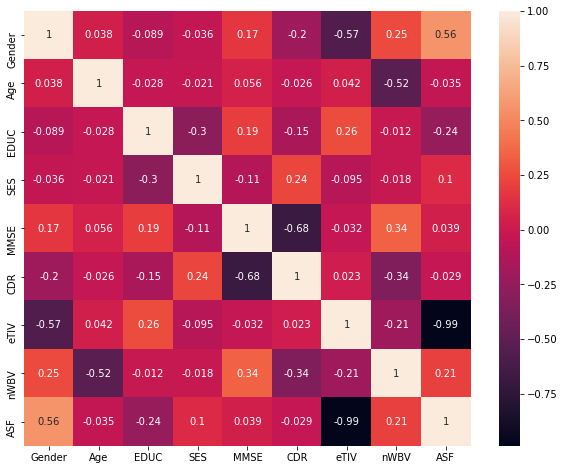

In [117]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)


#### Visualization of Age

<AxesSubplot:xlabel='Age', ylabel='Count'>

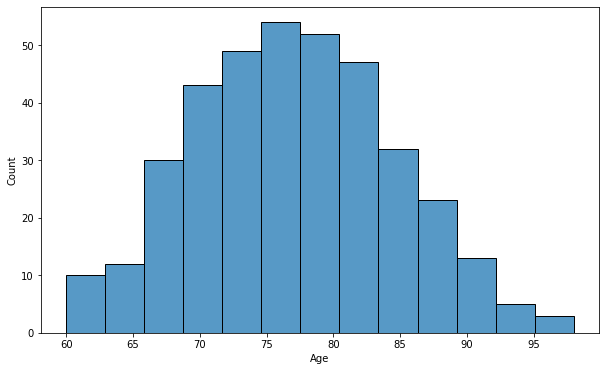

In [118]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='Age')

#### Probability distribution of Ages

<AxesSubplot:xlabel='Age', ylabel='Density'>

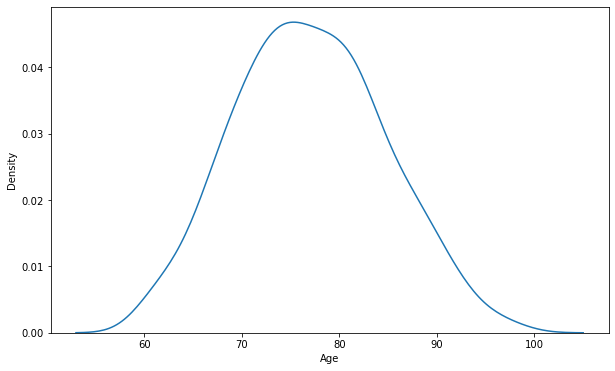

In [119]:
plt.figure(figsize=(10,6))
sns.kdeplot(data=df, x='Age')

#### Visualization of features : Group and SES

<AxesSubplot:xlabel='SES', ylabel='count'>

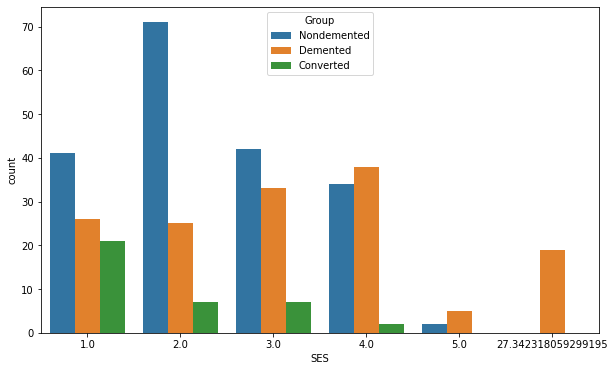

In [120]:
plt.figure(figsize=(10,6))
sns.countplot(data = df, x='SES', hue='Group')

#### Visualization of features: Clinical Dementia Rating (CDR) and Group

<AxesSubplot:xlabel='CDR', ylabel='count'>

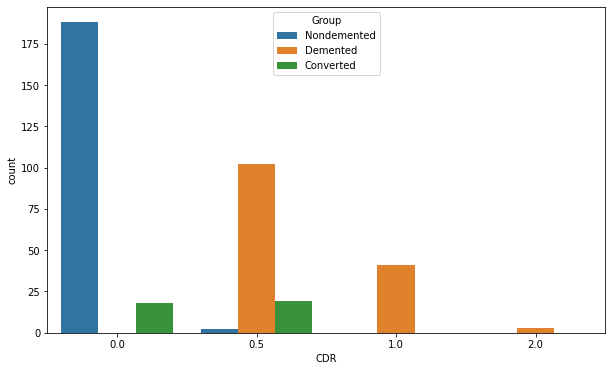

In [121]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='CDR', hue='Group')

#### Visualization of features: Mini-Mental State Exam (MMSE), Age and Group 

<AxesSubplot:xlabel='MMSE', ylabel='Age'>

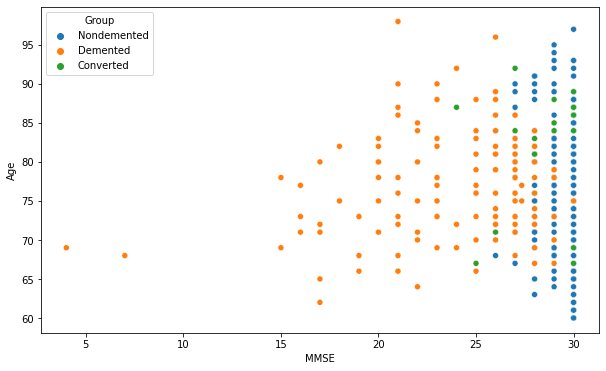

In [122]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='MMSE', y='Age', hue='Group')

<AxesSubplot:xlabel='MMSE', ylabel='Age'>

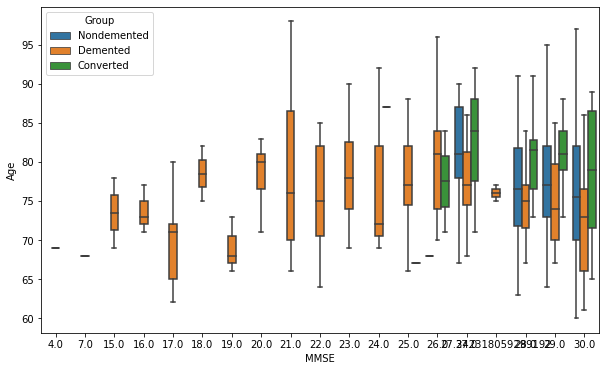

In [123]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='MMSE',y='Age', hue='Group')

<AxesSubplot:xlabel='MMSE', ylabel='Age'>

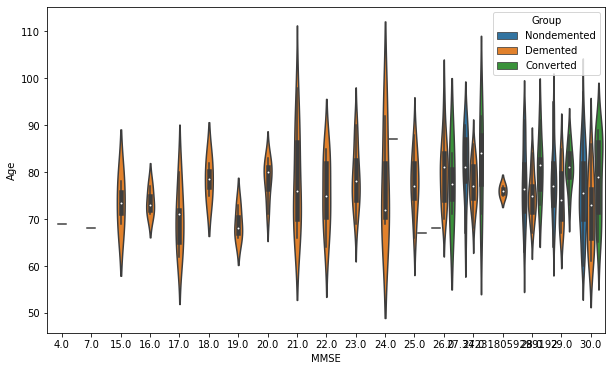

In [124]:
plt.figure(figsize=(10,6))
sns.violinplot(data=df, x='MMSE', y='Age',hue='Group')

#### Visualization of features: Estimated intracranial volume (eTIV), Age and Gender

<AxesSubplot:xlabel='eTIV', ylabel='Age'>

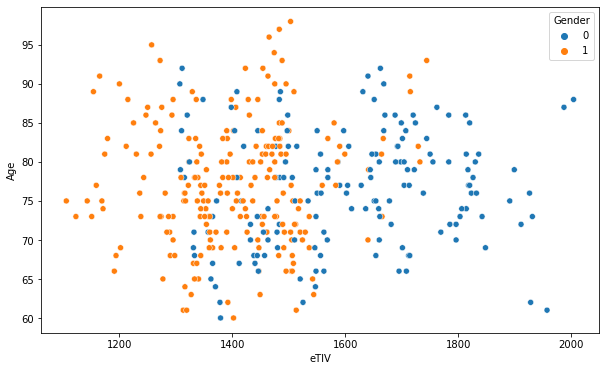

In [125]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='eTIV', y='Age', hue='Gender')

<AxesSubplot:xlabel='eTIV', ylabel='Age'>

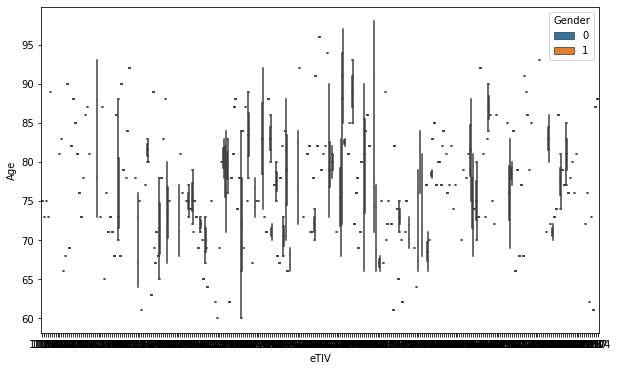

In [126]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='eTIV', y='Age', hue='Gender')

<AxesSubplot:xlabel='eTIV', ylabel='Age'>

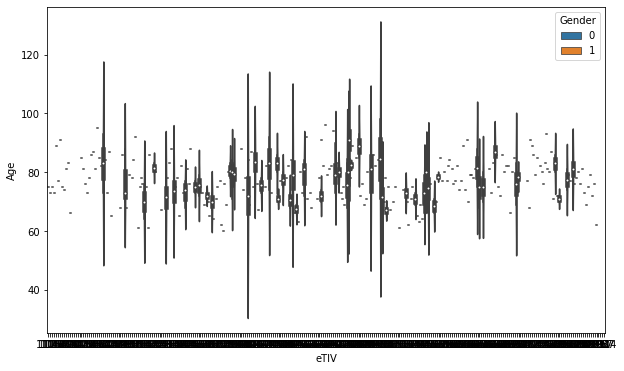

In [127]:
plt.figure(figsize=(10,6))
sns.violinplot(data=df, x='eTIV', y='Age', hue='Gender')

# Models Creation

### Load Libraries

In [128]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [129]:
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, plot_confusion_matrix


In [130]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation,Dense,Dropout
from tensorflow.keras import optimizers

tf.random.set_seed(13)
tf.debugging.set_log_device_placement(False)

#### split data into x and y

In [131]:
X = df.drop(['Group'],axis=1)
y = df.Group
print(X.shape, y.shape)

(373, 9) (373,)


In [132]:
y.unique() #print the unique values 

array(['Nondemented', 'Demented', 'Converted'], dtype=object)

In [133]:
print(X.shape, y.shape)

(373, 9) (373,)


#### splitting the data into train and test data

In [134]:
xtrain, xtest, ytrain, ytest = train_test_split(X,y,test_size=0.2,random_state=42)

#### standardize your data " to have mean = 0 and std = 1 "

In [135]:
sc = StandardScaler()
xtrain = sc.fit_transform(xtrain)
xtest = sc.transform (xtest)

### Scikit-learn Models

##### Model No 1: xgboost

In [136]:
xgboost = XGBClassifier()
xgboost.fit(xtrain, ytrain)
xgboost.score(xtest, ytest)

[16:39:50] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\25678\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\25678\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


0.8533333333333334

##### Model No 2: lightgbm

In [137]:
lightgbm = LGBMClassifier()
lightgbm.fit(xtrain, ytrain)
lightgbm.score(xtest, ytest)

0.8533333333333334

##### Model No 3: Logistic Regression

In [138]:
lr = LogisticRegression()
lr.fit(xtrain, ytrain)
lr.score(xtest, ytest)

0.8666666666666667

#### Model No 4: catboost

In [139]:
cb = CatBoostClassifier()
cb.fit(xtrain, ytrain)
cb.score(xtest, ytest)

Learning rate set to 0.074389
0:	learn: 1.0251185	total: 11.9ms	remaining: 11.9s
1:	learn: 0.9402968	total: 14.8ms	remaining: 7.36s
2:	learn: 0.8782274	total: 23.5ms	remaining: 7.8s
3:	learn: 0.8312964	total: 28.9ms	remaining: 7.19s
4:	learn: 0.7798304	total: 32.2ms	remaining: 6.41s
5:	learn: 0.7396123	total: 35.8ms	remaining: 5.93s
6:	learn: 0.6953293	total: 39.4ms	remaining: 5.59s
7:	learn: 0.6541834	total: 41ms	remaining: 5.08s
8:	learn: 0.6237734	total: 44.3ms	remaining: 4.88s
9:	learn: 0.5934294	total: 46.4ms	remaining: 4.6s
10:	learn: 0.5710181	total: 49.9ms	remaining: 4.48s
11:	learn: 0.5489632	total: 53.1ms	remaining: 4.37s
12:	learn: 0.5265995	total: 57.7ms	remaining: 4.38s
13:	learn: 0.5078446	total: 61.1ms	remaining: 4.3s
14:	learn: 0.4908002	total: 64.5ms	remaining: 4.24s
15:	learn: 0.4737609	total: 68.1ms	remaining: 4.19s
16:	learn: 0.4578707	total: 72.1ms	remaining: 4.17s
17:	learn: 0.4420311	total: 75.5ms	remaining: 4.12s
18:	learn: 0.4301375	total: 78.7ms	remaining: 4.0

172:	learn: 0.0930789	total: 873ms	remaining: 4.17s
173:	learn: 0.0919188	total: 879ms	remaining: 4.17s
174:	learn: 0.0913218	total: 888ms	remaining: 4.19s
175:	learn: 0.0909487	total: 895ms	remaining: 4.19s
176:	learn: 0.0906170	total: 903ms	remaining: 4.2s
177:	learn: 0.0900177	total: 910ms	remaining: 4.2s
178:	learn: 0.0896724	total: 919ms	remaining: 4.21s
179:	learn: 0.0892689	total: 926ms	remaining: 4.22s
180:	learn: 0.0887679	total: 935ms	remaining: 4.23s
181:	learn: 0.0884154	total: 942ms	remaining: 4.23s
182:	learn: 0.0880837	total: 951ms	remaining: 4.24s
183:	learn: 0.0873732	total: 959ms	remaining: 4.25s
184:	learn: 0.0869037	total: 1s	remaining: 4.42s
185:	learn: 0.0862812	total: 1.02s	remaining: 4.47s
186:	learn: 0.0857900	total: 1.04s	remaining: 4.52s
187:	learn: 0.0855126	total: 1.05s	remaining: 4.52s
188:	learn: 0.0849404	total: 1.06s	remaining: 4.55s
189:	learn: 0.0846388	total: 1.08s	remaining: 4.61s
190:	learn: 0.0843345	total: 1.09s	remaining: 4.62s
191:	learn: 0.083

343:	learn: 0.0440136	total: 2.53s	remaining: 4.82s
344:	learn: 0.0438553	total: 2.53s	remaining: 4.8s
345:	learn: 0.0436314	total: 2.54s	remaining: 4.79s
346:	learn: 0.0434628	total: 2.54s	remaining: 4.79s
347:	learn: 0.0433432	total: 2.55s	remaining: 4.78s
348:	learn: 0.0432055	total: 2.56s	remaining: 4.77s
349:	learn: 0.0430785	total: 2.56s	remaining: 4.76s
350:	learn: 0.0428537	total: 2.57s	remaining: 4.76s
351:	learn: 0.0427269	total: 2.58s	remaining: 4.74s
352:	learn: 0.0425729	total: 2.58s	remaining: 4.73s
353:	learn: 0.0424233	total: 2.59s	remaining: 4.72s
354:	learn: 0.0422578	total: 2.6s	remaining: 4.72s
355:	learn: 0.0421255	total: 2.6s	remaining: 4.71s
356:	learn: 0.0419888	total: 2.61s	remaining: 4.7s
357:	learn: 0.0418039	total: 2.62s	remaining: 4.69s
358:	learn: 0.0417147	total: 2.62s	remaining: 4.68s
359:	learn: 0.0416469	total: 2.63s	remaining: 4.67s
360:	learn: 0.0415169	total: 2.64s	remaining: 4.67s
361:	learn: 0.0413259	total: 2.64s	remaining: 4.66s
362:	learn: 0.04

503:	learn: 0.0280707	total: 3.59s	remaining: 3.54s
504:	learn: 0.0280273	total: 3.6s	remaining: 3.53s
505:	learn: 0.0279920	total: 3.61s	remaining: 3.52s
506:	learn: 0.0279330	total: 3.62s	remaining: 3.52s
507:	learn: 0.0278578	total: 3.62s	remaining: 3.51s
508:	learn: 0.0278033	total: 3.63s	remaining: 3.5s
509:	learn: 0.0277017	total: 3.64s	remaining: 3.49s
510:	learn: 0.0276757	total: 3.64s	remaining: 3.48s
511:	learn: 0.0275850	total: 3.65s	remaining: 3.48s
512:	learn: 0.0275252	total: 3.65s	remaining: 3.47s
513:	learn: 0.0274841	total: 3.66s	remaining: 3.46s
514:	learn: 0.0274228	total: 3.67s	remaining: 3.45s
515:	learn: 0.0273417	total: 3.67s	remaining: 3.44s
516:	learn: 0.0272594	total: 3.68s	remaining: 3.44s
517:	learn: 0.0271587	total: 3.69s	remaining: 3.43s
518:	learn: 0.0270978	total: 3.69s	remaining: 3.42s
519:	learn: 0.0270396	total: 3.7s	remaining: 3.41s
520:	learn: 0.0269807	total: 3.7s	remaining: 3.4s
521:	learn: 0.0269109	total: 3.71s	remaining: 3.39s
522:	learn: 0.026

666:	learn: 0.0198991	total: 4.49s	remaining: 2.24s
667:	learn: 0.0198455	total: 4.5s	remaining: 2.24s
668:	learn: 0.0198194	total: 4.51s	remaining: 2.23s
669:	learn: 0.0197854	total: 4.51s	remaining: 2.22s
670:	learn: 0.0197269	total: 4.52s	remaining: 2.22s
671:	learn: 0.0197025	total: 4.52s	remaining: 2.21s
672:	learn: 0.0196607	total: 4.53s	remaining: 2.2s
673:	learn: 0.0196362	total: 4.53s	remaining: 2.19s
674:	learn: 0.0196045	total: 4.54s	remaining: 2.19s
675:	learn: 0.0195694	total: 4.54s	remaining: 2.18s
676:	learn: 0.0195256	total: 4.55s	remaining: 2.17s
677:	learn: 0.0194717	total: 4.55s	remaining: 2.16s
678:	learn: 0.0194498	total: 4.56s	remaining: 2.15s
679:	learn: 0.0194260	total: 4.57s	remaining: 2.15s
680:	learn: 0.0193898	total: 4.57s	remaining: 2.14s
681:	learn: 0.0193790	total: 4.58s	remaining: 2.13s
682:	learn: 0.0193557	total: 4.58s	remaining: 2.13s
683:	learn: 0.0193267	total: 4.58s	remaining: 2.12s
684:	learn: 0.0192842	total: 4.59s	remaining: 2.11s
685:	learn: 0.

834:	learn: 0.0152369	total: 5.62s	remaining: 1.11s
835:	learn: 0.0152087	total: 5.63s	remaining: 1.1s
836:	learn: 0.0151919	total: 5.64s	remaining: 1.1s
837:	learn: 0.0151718	total: 5.65s	remaining: 1.09s
838:	learn: 0.0151575	total: 5.65s	remaining: 1.08s
839:	learn: 0.0151348	total: 5.66s	remaining: 1.08s
840:	learn: 0.0151196	total: 5.67s	remaining: 1.07s
841:	learn: 0.0150945	total: 5.67s	remaining: 1.06s
842:	learn: 0.0150719	total: 5.68s	remaining: 1.06s
843:	learn: 0.0150486	total: 5.69s	remaining: 1.05s
844:	learn: 0.0150309	total: 5.7s	remaining: 1.04s
845:	learn: 0.0150114	total: 5.7s	remaining: 1.04s
846:	learn: 0.0149961	total: 5.71s	remaining: 1.03s
847:	learn: 0.0149736	total: 5.72s	remaining: 1.02s
848:	learn: 0.0149577	total: 5.72s	remaining: 1.02s
849:	learn: 0.0149445	total: 5.73s	remaining: 1.01s
850:	learn: 0.0149295	total: 5.74s	remaining: 1s
851:	learn: 0.0149092	total: 5.74s	remaining: 997ms
852:	learn: 0.0148876	total: 5.75s	remaining: 990ms
853:	learn: 0.01486

995:	learn: 0.0124353	total: 6.69s	remaining: 26.9ms
996:	learn: 0.0124193	total: 6.7s	remaining: 20.2ms
997:	learn: 0.0124082	total: 6.71s	remaining: 13.5ms
998:	learn: 0.0123927	total: 6.72s	remaining: 6.73ms
999:	learn: 0.0123826	total: 6.73s	remaining: 0us


0.8533333333333334

##### Model No 5: Gradient Boosting Classifier

In [140]:
gbmc = GradientBoostingClassifier()
gbmc.fit(xtrain,ytrain)
gbmc.score(xtest, ytest)

0.84

##### Model No 6: Random Forest Classifier

In [141]:
rf  = RandomForestClassifier(random_state=42)
rf.fit(xtrain, ytrain)
rf.score(xtest, ytest)

0.88

##### Model No 7: KNeighbors Classifier

In [142]:
knc = KNeighborsClassifier()
knc.fit(xtrain, ytrain)
knc.score(xtest, ytest)


0.8266666666666667

In [143]:
models = [xgboost, lightgbm, lr, cb, gbmc, rf, knc]
r = pd.DataFrame(columns=["MODELS","ACC","PRECISION", "RECALL", 'F1_SCORE'])

for model in models:
    name = model.__class__.__name__
    #predict = model.predict(X_test)
    accuracy = round(model.score(xtest, ytest),3)
    precision = round(precision_score(ytest, model.predict(xtest), average='macro', zero_division=0),3)
    recall = round(recall_score(ytest, model.predict(xtest), average='macro', zero_division=0),3)
    f1_scores = round(f1_score(ytest, model.predict(xtest), average='macro', zero_division=0),3)
    print("-" * 28)
    print(name + ": ")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"f1_score: {f1_scores}")
    result = pd.DataFrame([[name,accuracy*100, precision*100, recall*100, f1_scores*100]],columns=["MODELS","ACC","PRECISION","RECALL", "F1_SCORE"])
    r = r.append(result)


C:\Users\25678\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\25678\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\25678\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\25678\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


----------------------------
XGBClassifier: 
Accuracy: 0.853
Precision: 0.797
Recall: 0.706
f1_score: 0.703
----------------------------
LGBMClassifier: 
Accuracy: 0.853
Precision: 0.796
Recall: 0.706
f1_score: 0.703
----------------------------
LogisticRegression: 
Accuracy: 0.867
Precision: 0.912
Recall: 0.717
f1_score: 0.717
----------------------------
CatBoostClassifier: 
Accuracy: 0.853
Precision: 0.781
Recall: 0.726
f1_score: 0.732
----------------------------
GradientBoostingClassifier: 
Accuracy: 0.84
Precision: 0.74
Recall: 0.696
f1_score: 0.691
----------------------------
RandomForestClassifier: 
Accuracy: 0.88
Precision: 0.917
Recall: 0.747
f1_score: 0.761
----------------------------
KNeighborsClassifier: 
Accuracy: 0.827
Precision: 0.711
Recall: 0.686
f1_score: 0.681


Text(0.5, 1.0, 'MODEL ACCURACY COMPARISON')

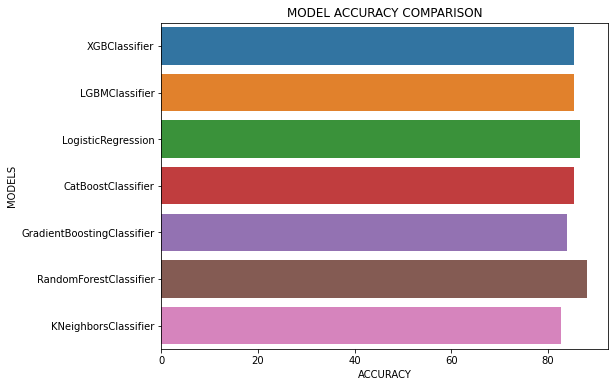

In [144]:
plt.figure(figsize=(8,6))
sns.barplot(x="ACC",y="MODELS",data=r)
plt.xlabel("ACCURACY")
plt.title("MODEL ACCURACY COMPARISON")

### Deep Learning

#### create model

In [145]:
model = Sequential()
model.add(Dense(16, input_dim=X.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 16)                160       
_________________________________________________________________
dense_15 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_16 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_17 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_18 (Dense)             (None, 32)                4128      
_________________________________________________________________
dense_19 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_20 (Dense)             (None, 3)                

#### compile model

In [146]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy'])

In [147]:
ytrain.shape, xtrain.shape

((298,), (298, 9))

In [148]:
y.shape

(373,)

In [149]:
new_y  = pd.get_dummies(y)
new_y

,Converted,Demented,Nondemented
0,0,0,1
1,0,0,1
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
368,0,1,0
369,0,1,0
370,0,0,1
371,0,0,1


In [150]:
new_y.shape

(373, 3)

In [151]:
# splitting the data again into train and test data
new_xtrain, new_xtest, new_ytrain, new_ytest = train_test_split(X,new_y,test_size=0.2,random_state=42)

# standardize data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
new_xtrain = sc.fit_transform(new_xtrain)
new_xtest = sc.transform (new_xtest)

#### Train the model

In [152]:
history = model.fit(new_xtrain, new_ytrain, epochs = 10, batch_size=16, validation_data=(new_xtest, new_ytest))
model.save('model.h5')


Epoch 1/10
19/19 [==============================] - 0s 24ms/step - loss: 0.9653 - accuracy: 0.4463 - val_loss: 0.9109 - val_accuracy: 0.4400
Epoch 2/10
19/19 [==============================] - 0s 3ms/step - loss: 0.7987 - accuracy: 0.7315 - val_loss: 0.7945 - val_accuracy: 0.7200
Epoch 3/10
19/19 [==============================] - 0s 3ms/step - loss: 0.6830 - accuracy: 0.8188 - val_loss: 0.7064 - val_accuracy: 0.7600
Epoch 4/10
19/19 [==============================] - 0s 3ms/step - loss: 0.5114 - accuracy: 0.8557 - val_loss: 0.6993 - val_accuracy: 0.6933
Epoch 5/10
19/19 [==============================] - 0s 3ms/step - loss: 0.4044 - accuracy: 0.8624 - val_loss: 0.5739 - val_accuracy: 0.8267
Epoch 6/10
19/19 [==============================] - 0s 3ms/step - loss: 0.3192 - accuracy: 0.8993 - val_loss: 0.5725 - val_accuracy: 0.8400
Epoch 7/10
19/19 [==============================] - 0s 4ms/step - loss: 0.2725 - accuracy: 0.9262 - val_loss: 0.5553 - val_accuracy: 0.8400
Epoch 8/10
19/19 [=

In [153]:
model.evaluate(new_xtest,new_ytest)

3/3 [==============================] - 0s 2ms/step - loss: 0.5530 - accuracy: 0.8400


[0.5530458092689514, 0.8399999737739563]

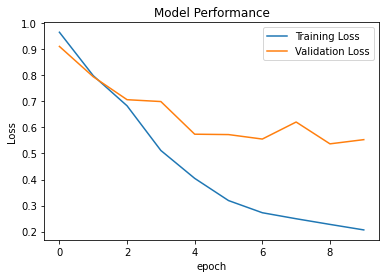

In [154]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Performance')
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.legend(['Training Loss','Validation Loss'])
plt.show()

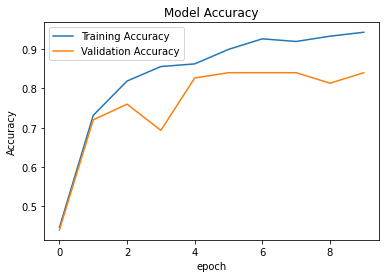

In [155]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy','Validation Accuracy'])
plt.show()

In [156]:
test = xtest[:5]
preds = model.predict(test)
preds

# final_pred = class_names[np.argmax(a)]
# final_pred


array([[6.0729530e-02, 9.3916482e-01, 1.0572291e-04],
       [9.2794344e-02, 6.8854401e-03, 9.0032029e-01],
       [2.4294016e-01, 5.5711281e-01, 1.9994704e-01],
       [2.6354803e-02, 7.8737817e-04, 9.7285789e-01],
       [6.8127982e-02, 4.5994441e-03, 9.2727250e-01]], dtype=float32)

In [157]:
preds[1]
class_names = ['Converted','Demented','Nondemented']
final_pred = class_names[np.argmax(preds[1])]
print('Health status: ',final_pred)

Health status:  Nondemented


In [158]:
# https://www.youtube.com/watch?v=2WdPdE2hq78

In [159]:
# #saving the model
# import pickle
# # Save the trained model as a pickle string.
# saved_model = pickle.dumps(model)
 
# # Load the pickled model
# model_from_pickle = pickle.loads(saved_model)
 
# # Use the loaded pickled model to make predictions
# # knn_from_pickle.predict(X_test)